In [1]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from lib.svx001 import create_position, read_factors#, scale_factors

In [3]:
from lib.cux002 import StrategyEvaluate1

In [4]:
method = 'bicso0'
instruments = 'rbb'
task_id = '113001'
period = 5
name = 'lgbm'

In [14]:
#strategy_settings = {'commission': 0.000024, 'slippage': 0, 'size': 200}
strategy_settings = {'commission': 0.00002, 'slippage': 0, 'size': 10}

In [15]:
predict_data = read_factors(method=method,
                                instruments=instruments,
                                task_id=task_id,
                                period=period,
                                name=name)
predict_data.head()

,trade_time,code,nxt1_ret_5h,predict
4,2024-09-04 09:45:00,RB,0.000621,0.000083
9,2024-09-04 09:50:00,RB,0.000697,0.000081
14,2024-09-04 09:55:00,RB,0.000195,0.000067
19,2024-09-04 10:00:00,RB,-0.001021,0.000069
24,2024-09-04 10:05:00,RB,-0.000899,0.000074


In [16]:
predict_data['transformed'] = predict_data['predict']

In [17]:
predict_data.head()

,trade_time,code,nxt1_ret_5h,predict,transformed
4,2024-09-04 09:45:00,RB,0.000621,0.000083,0.000083
9,2024-09-04 09:50:00,RB,0.000697,0.000081,0.000081
14,2024-09-04 09:55:00,RB,0.000195,0.000067,0.000067
19,2024-09-04 10:00:00,RB,-0.001021,0.000069,0.000069
24,2024-09-04 10:05:00,RB,-0.000899,0.000074,0.000074


In [18]:
signal_method = 'rollrank_signal'
signal_params = {'roll_num':24, 'threshold':0.7}
strategy_method = None#'trailing_atr_strategy'
strategy_params = None#{'atr_period':14,'atr_multiplier':6, 'max_volume':1}
#signal_method = 'quantile_signal'
#signal_params = {'roll_num':20, 'threshold':0.7}

In [19]:
predict_data['transformed'] = predict_data['predict']

In [20]:
pos_data, total_data2 = create_position(predict_data=predict_data,
                    signal_method=signal_method,
                    signal_params=signal_params,
                    strategy_method=strategy_method,
                    strategy_params=strategy_params)

In [21]:
eval1 = StrategyEvaluate1(pos_data=pos_data, total_data=total_data2,
                  strategy_settings=strategy_settings,
                  strategy_name=signal_method,
                  ret_name='nxt1_ret_{0}h'.format(period),
)

In [22]:
eval1.run()

{'final_return': 0.2612679875963426,
 'annual_return': 0.3517578169421114,
 'sharpe_ratio': 1.694643690789032,
 'calmar_ratio': 2.0180933315314036,
 'p/l_ratio': 1.0589440284034166,
 'win_ratio': 0.5097947761194029,
 'turnover': 0.8667210820895522,
 'max_drawdown': -0.12946278723297838,
 'downside_risk': 0.12142266208359086,
 'annual_volatility': 0.18836231112552138}

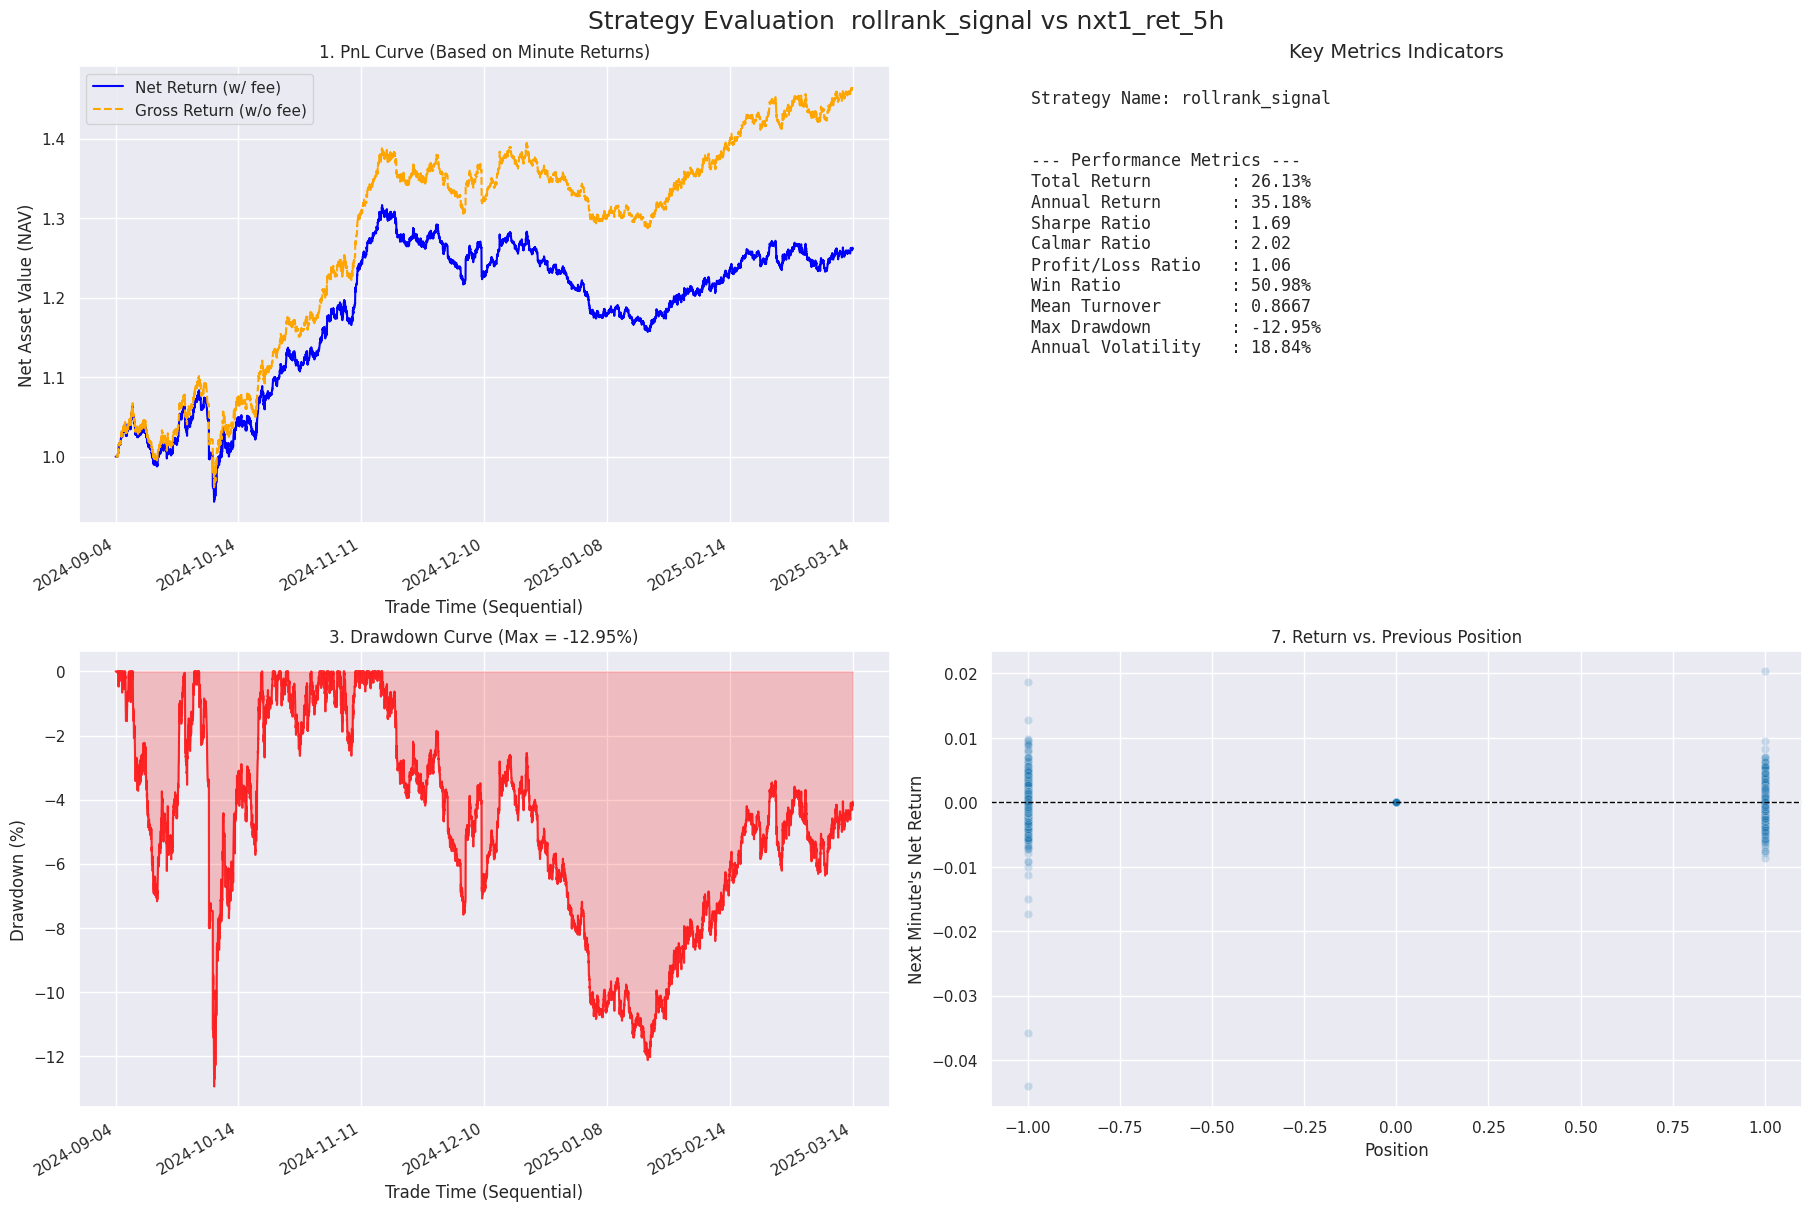

In [23]:
eval1.plot_results()